# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

In [2]:
A,a = main.diag_dominant_matrix_A_b(5)
print(A)
B,b = main.diag_dominant_matrix_A_b(3)
print(B)
C,c = main.diag_dominant_matrix_A_b(7)
print(C)

print(main.is_diag_dominant(A))
print(main.is_diag_dominant(B))
print(main.is_diag_dominant(C))


[[42  4  2  7  5]
 [ 5 52  7  0  8]
 [ 1  2 43  2  1]
 [ 7  5  8 57  0]
 [ 2  0  8  4 28]]
[[11  0  1]
 [ 1 20  8]
 [ 6  2 23]]
[[83  0  8  2  4  2  7]
 [ 0 58  0  1  5  6  1]
 [ 7  8 50  0  1  3  1]
 [ 7  3  4 61  3  6  2]
 [ 8  5  3  6 70  7  3]
 [ 6  8  8  2  4 57  2]
 [ 8  0  4  4  3  3 47]]
True
True
True


***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

In [3]:
A,a = main.symmetric_matrix_A_b(5)
B,b = main.symmetric_matrix_A_b(3)
C,c = main.symmetric_matrix_A_b(7)
print(A)
print(B)
print(C)

print(main.is_symmetric(A))
print(main.is_symmetric(B))
print(main.is_symmetric(C))



[[ 6 11  4  5  7]
 [11  2  4 11  7]
 [ 4  4 16  9 12]
 [ 5 11  9 10  9]
 [ 7  7 12  9 16]]
[[ 0  8  1]
 [ 8  4  4]
 [ 1  4 14]]
[[ 4 11 13  6  3  8 10]
 [11  6  5 10 15  4 14]
 [13  5  8 13  3  8  9]
 [ 6 10 13  6 12  5  6]
 [ 3 15  3 12  0  6  8]
 [ 8  4  8  5  6  0 11]
 [10 14  9  6  8 11  6]]
True
True
True



***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach $m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [4]:
A1,b1 = main.random_matrix_Ab(10)
A2,b2 = main.diag_dominant_matrix_A_b(10)
A3,b3 = main.symmetric_matrix_A_b(10)
#print(A1)
#print(A2)
#print(A3)


***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Norma:  5.1021965732705153e-14
18.9 µs ± 7.47 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Macierz nie jest diagonalnie dominująca, nie można użyć funckji solve_jacobi 
Macierz nie jest symatryczna, nie można użyć metody gradientów sprzeżonych


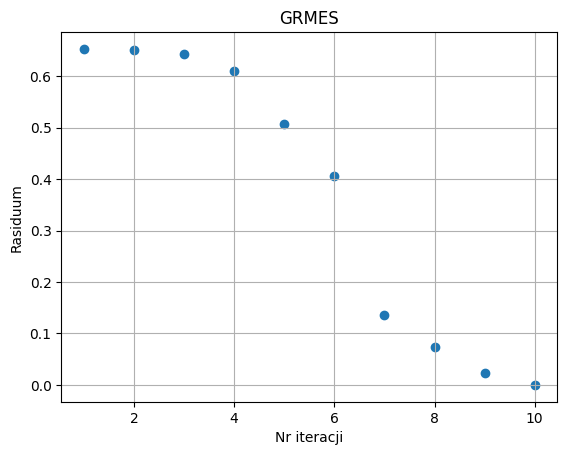

341 µs ± 39.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


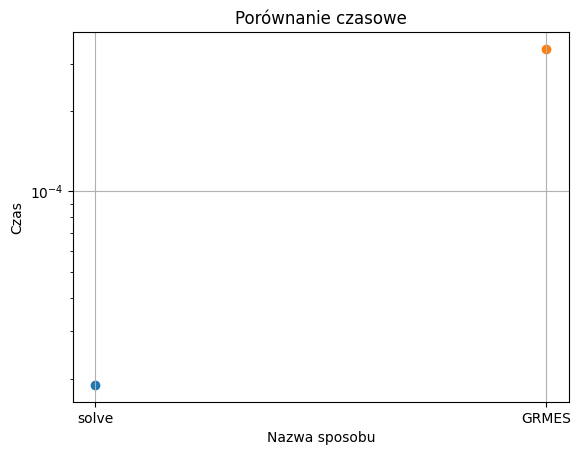

In [5]:
sol1 = np.linalg.solve(A1,b1)
res1 = main.residual(A1,sol1,b1)
print("Norma: ", res1)
time1 = %timeit -r 5 -n 10 -o result = np.linalg.solve(A1,b1)
time_avr1 = time1.average

if main.is_diag_dominant(A1):
  x_init = np.zeros((10, 1))
  x_new, k = main.solve_jacobi(A1, b1, x_init)
  print("Norma: ", main.residual(A1, x_new, b1))
  #time2 = %timeit -r 5 -n 10 -o result = main.solve_jacobi(A1,b1,x_init)
  #time_avr2 = time2.average
else:
  print("Macierz nie jest diagonalnie dominująca, nie można użyć funckji solve_jacobi ")


if main.is_symmetric(A1):
    print('Macierz jest symetryczna, można użyć metody gradientów sprzężonych')
else:
    print("Macierz nie jest symatryczna, nie można użyć metody gradientów sprzeżonych")

error = []

def callback(X):
    error.append(X)

x, exitCode = sp.sparse.linalg.gmres(A1, b1, maxiter=10, callback=callback, callback_type='pr_norm')


res= []
for i in range(len(error)):
    res.append(i+1)
plt.scatter(res, error)
plt.title("GRMES")
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel("Nr iteracji")
plt.ylabel("Rasiduum")
plt.grid()
plt.show()

time2 = %timeit -r 5 -n 10 -o result = sp.sparse.linalg.gmres(A1, b1, maxiter=10, callback=callback, callback_type='pr_norm')
time_avr2 = time2.average

lst = ['solve' , 'GRMES']

plt.scatter( lst[0], time_avr1)
plt.scatter( lst[1] , time_avr2)
plt.title("Porównanie czasowe")
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nazwa sposobu")
plt.ylabel("Czas")
plt.grid()
plt.show()



***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Norma solve:  1.4043333874306805e-15
The slowest run took 4.12 times longer than the fastest. This could mean that an intermediate result is being cached.
29.2 µs ± 16.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Norma solve_jacobi:  1.8333201162916213e-07
434 µs ± 68.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Macierz nie jest symatryczna, nie można użyć metody gradientów sprzeżonych


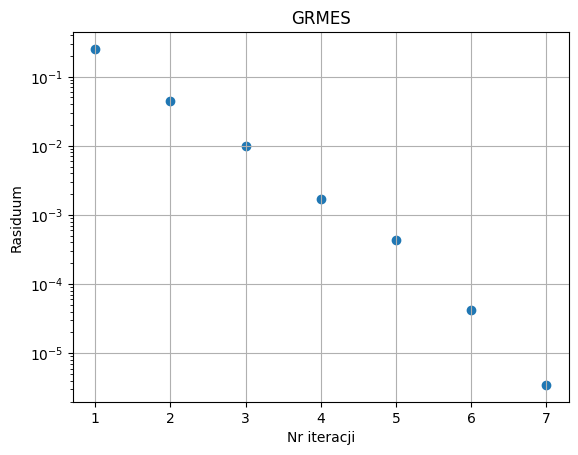

292 µs ± 60.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


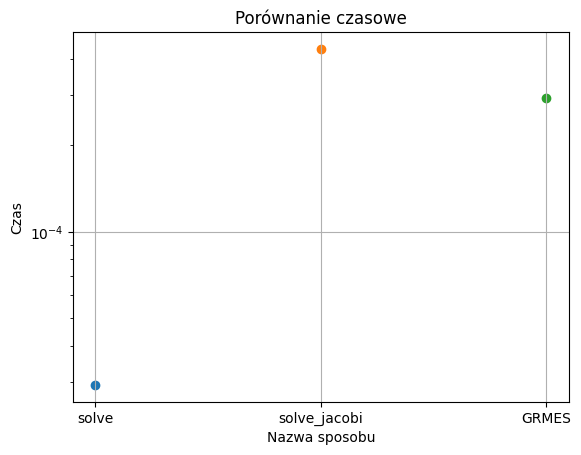

In [6]:
sol2 = np.linalg.solve(A2,b2)
res2 = main.residual(A2,sol2,b2)
print("Norma solve: ", res2)
time1 = %timeit -r 5 -n 10 -o result = np.linalg.solve(A2,b2)
time_avr1 = time1.average

if main.is_diag_dominant(A2):
  x_init = np.zeros((10, 1))
  x_new, k = main.solve_jacobi(A2, b2, x_init)
  print("Norma solve_jacobi: ", main.residual(A2, x_new, b2))
  time2 = %timeit -r 5 -n 10 -o result = main.solve_jacobi(A2,b2,x_init)
  time_avr2 = time2.average
else:
  print("Macierz nie jest diagonalnie dominująca, nie można użyć funckji solve_jacobi ")


if main.is_symmetric(A2):
    print('Macierz jest symetryczna, można użyć metody gradientów sprzężonych')
else:
    print("Macierz nie jest symatryczna, nie można użyć metody gradientów sprzeżonych")

error = []

def callback(X):
    error.append(X)

x, exitCode = sp.sparse.linalg.gmres(A2, b2, maxiter=10, callback=callback, callback_type='pr_norm')


res= []
for i in range(len(error)):
    res.append(i+1)
plt.scatter(res, error)
plt.title("GRMES")
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nr iteracji")
plt.ylabel("Rasiduum")
plt.grid()
plt.show()

time3 = %timeit -r 5 -n 10 -o result = sp.sparse.linalg.gmres(A2, b2, maxiter=10, callback=callback, callback_type='pr_norm')
time_avr3 = time3.average

lst = ['solve' ,'solve_jacobi', 'GRMES']

plt.scatter( lst[0], time_avr1)
plt.scatter( lst[1] , time_avr2)
plt.scatter(lst[2], time_avr3)
plt.title("Porównanie czasowe")
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nazwa sposobu")
plt.ylabel("Czas")
plt.grid()
plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

Norma solve:  2.589462819655575e-15
21.2 µs ± 11.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Macierz nie jest diagonalnie dominująca, nie można użyć funckji solve_jacobi 
Macierz jest symetryczna, można użyć metody gradientów sprzężonych


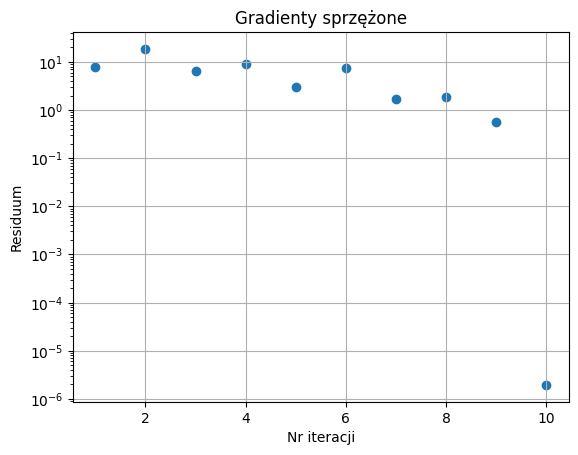

428 µs ± 67.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


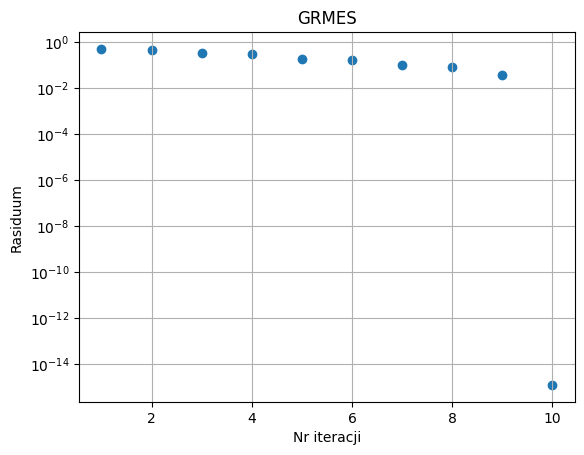

280 µs ± 40.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


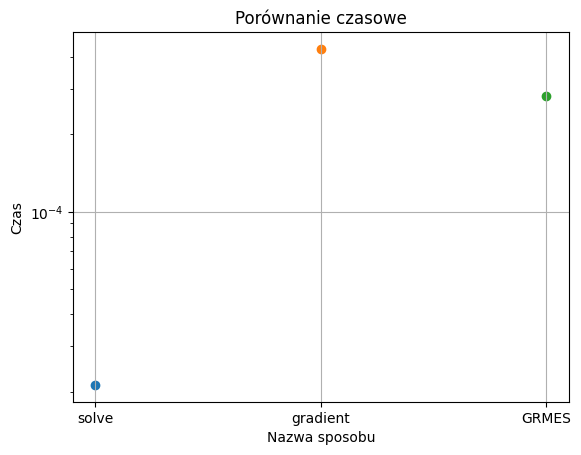

In [7]:
sol3 = np.linalg.solve(A3,b3)
res3 = main.residual(A3,sol3,b3)
print("Norma solve: ", res3)
time1 = %timeit -r 5 -n 10 -o result = np.linalg.solve(A3,b3)
time_avr1 = time1.average

if main.is_diag_dominant(A3):
  x_init = np.zeros((10, 1))
  x_new, k = main.solve_jacobi(A3, b3, x_init)
  print("Norma solve_jacobi: ", main.residual(A3, x_new, b3))
  #time2 = %timeit -r 5 -n 10 -o result = main.solve_jacobi(A3,b3,x_init)
  #time_avr2 = time2.average
else:
  print("Macierz nie jest diagonalnie dominująca, nie można użyć funckji solve_jacobi ")


if main.is_symmetric(A3):
    print('Macierz jest symetryczna, można użyć metody gradientów sprzężonych')
else:
    print("Macierz nie jest symatryczna, nie można użyć metody gradientów sprzeżonych")
#metoda gradientów sprzężonych 
error_g = []
def callback_(X):
    error_g.append(np.linalg.norm(b3 - A3 @ X))


x, exitCode = sp.sparse.linalg.cg(A3, b3, maxiter = 10, callback = callback_, atol = 2.2e-16)
lstg= []
for i in range(len(error_g)):
    lstg.append(i+1)
plt.scatter(lstg, error_g)
plt.title("Gradienty sprzężone")
plt.yscale('log')
#plt.xscale('log')
plt.xlabel("Nr iteracji")
plt.ylabel('Residuum')
plt.grid()
plt.show()


time6 = %timeit -r 5 -n 10 -o result = sp.sparse.linalg.cg(A3, b3, maxiter = 10, callback = callback_, atol = 2.2e-16)
time_avr6 = time6.average


#metoda GMRES
error = []

def callback(X):
    error.append(X)

x, exitCode = sp.sparse.linalg.gmres(A3, b3, maxiter=10, callback=callback, callback_type='pr_norm')


res= []
for i in range(len(error)):
    res.append(i+1)
plt.scatter(res, error)
plt.title("GRMES")
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nr iteracji")
plt.ylabel("Rasiduum")
plt.grid()
plt.show()

time5 = %timeit -r 5 -n 10 -o result = sp.sparse.linalg.gmres(A3, b3, maxiter=10, callback=callback, callback_type='pr_norm')
time_avr5 = time5.average

lst = ['solve' ,'gradient', 'GRMES']

plt.scatter( lst[0], time_avr1)
plt.scatter( lst[1] , time_avr6)
plt.scatter(lst[2], time_avr5)
plt.title("Porównanie czasowe")
#plt.xscale('log')
plt.yscale('log')
plt.xlabel("Nazwa sposobu")
plt.ylabel("Czas")
plt.grid()
plt.show()


WNIOSKI 

W tym laboratorium należało zdefiniować najpierw pare funkcji, aby przejść do głownego zadania czyli rozwiązywanie równań z zadania 3 różnymi sposobami. Funkcja solve działa na wszystkie 3 przypadki, jak i również funkcja GRMES działa na wszystkie przypadki. Rówznież funkcja solve wydaje się być najszybsza patrząc na wykresy. Metoda gradientów działa jedynie na macierze symetryczne, natomiast moją funkcję solve_jacobi można jedynie używać do macierzy diagonalnie dominującej.  

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)